<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/25%20-%20Sklearn%20Ensemble%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ESEO DSMT 
## DATA SCIENCE II
## 28 Oct. 2021 - Ensemble Learning 
### Name:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

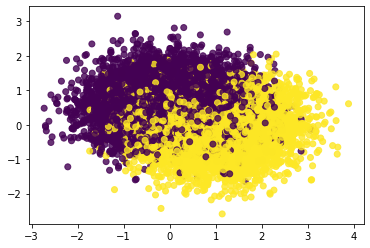

In [2]:
#data set generration
X, y = make_moons(n_samples=10000, noise=0.6, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8);

In [3]:
#test*train split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### 1. Individual models

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [5]:
models = []
models.append(("LogReg",LogisticRegression(random_state=0)))
models.append(("CART", DecisionTreeClassifier(random_state=0)))
models.append(("SVC", SVC(random_state=0)))
   

In [6]:
for name,model in models :
    model.fit(X_train,y_train)
    print(name, model.score(X_test,y_test))

LogReg 0.7995
CART 0.711
SVC 0.8055


### 2. Ensamble: Voting classifiers

In [7]:
from sklearn.ensemble import VotingClassifier

In [8]:
model_ensemble = VotingClassifier(models, voting='hard')
model_ensemble.fit(X_train,y_train)
print("Voting classifier",model_ensemble.score(X_test,y_test))

Voting classifier 0.8015


### 3 Ensamble: Bagging classifiers

#### 3.1 Bagging Tree

In [9]:
from sklearn.ensemble import BaggingClassifier

In [10]:
y_ensemble = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),n_estimators=200)
y_ensemble.fit(X_train,y_train)
y_ensemble.score(X_test,y_test)

0.809

#### 3.2 Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
y_ensemble = RandomForestClassifier(max_depth=5,n_estimators=100)

In [13]:
y_ensemble.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [14]:
y_ensemble.score(X_test,y_test)

0.8075

### 4 Ensamble: Boosting classifiers


In [15]:
from sklearn.ensemble import AdaBoostClassifier

#### 4.1 AdaBoost

In [17]:
model = AdaBoostClassifier(n_estimators=10,algorithm='SAMME')
model.fit(X_train,y_train)
model.estimator_weights_

array([0.98702549, 0.7036406 , 0.57121982, 0.37780015, 0.2836753 ,
       0.26028065, 0.2116658 , 0.0913    , 0.20961126, 0.10104908])

#### 4.2 Gradient Boosting

### 5 Ensamble: Stacking classifiers